In [1]:
import jqdatasdk
# 登录聚宽账号
from jqdatasdk import *
# auth('ID','Password') #ID是申请时所填写的手机号；Password为聚宽官网登录密码
auth('18826575756', 'Zyh20010612')

auth success 


In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import math

In [3]:
def get_ori_data(code):         #根据单个代码获取收益率
    ori_data = get_price(code, start_date='2010-01-01', end_date='2020-01-01', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
    ori_data.drop(['open','high','low','volume','money'],axis=1,inplace=True)
    ori_data.columns = [code]
    return ori_data

In [4]:
def get_ori_name(code): # 获得股票名字
    ori_data = get_security_info(code)
    ori_data_list = ori_data.index.tolist()
    return ori_data_list

In [39]:
stocks = get_index_stocks('000016.XSHG')
stocks = stocks[1:]

In [40]:
name = []
for i in stocks:
    name.append(get_security_info(i).display_name)

In [41]:
data_ = pd.DataFrame()
for i in stocks:
    a = get_ori_data(i)
    data_ = pd.concat([data_,a],axis = 1)
data_.columns = name
data_  = data_.dropna(axis = 1)

In [42]:
data_choose = get_price('600000.XSHG',start_date='2010-01-01', end_date='2020-01-01',frequency='daily', fields=['open','close','high','low','volume'],skip_paused=False, fq='pre', panel=True)

In [43]:
data = pd.concat([data_choose,data_],axis = 1)
data

,open,close,high,low,volume,中国石化,中信证券,三一重工,招商银行,保利发展,...,兴业银行,中国平安,工商银行,中国太保,中国人寿,中国建筑,中国石油,中国中免,紫金矿业,中远海控
2010-01-04,5.98,5.80,5.99,5.80,241629662.0,5.93,15.86,6.45,10.92,4.98,...,8.95,21.53,2.89,18.69,25.44,2.36,9.80,9.48,4.93,10.43
2010-01-05,5.86,5.85,5.91,5.70,420344422.0,5.97,16.64,6.46,10.93,4.83,...,8.78,21.80,2.92,19.28,25.75,2.34,9.99,9.50,5.04,10.71
2010-01-06,5.83,5.73,5.83,5.72,353302144.0,5.84,16.44,6.63,10.70,4.82,...,8.69,21.34,2.89,19.04,24.95,2.32,9.85,9.24,4.96,10.73
2010-01-07,5.72,5.60,5.76,5.56,311151951.0,5.69,16.04,6.57,10.42,4.83,...,8.73,20.94,2.82,18.62,24.49,2.29,9.79,9.53,4.88,10.41
2010-01-08,5.57,5.67,5.70,5.56,239863973.0,5.63,16.35,6.45,10.42,4.89,...,8.73,20.82,2.83,18.25,24.52,2.30,9.67,9.38,4.84,10.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,11.10,11.05,11.10,11.01,15150873.0,4.42,22.40,15.90,35.74,13.61,...,18.15,78.84,5.25,33.80,32.35,4.94,5.30,86.48,4.01,3.91
2019-12-26,11.07,11.10,11.12,11.04,17433642.0,4.42,23.00,15.93,36.04,14.15,...,18.33,79.31,5.28,34.03,32.81,5.07,5.30,87.52,4.06,4.10
2019-12-27,11.06,11.12,11.22,11.06,30939495.0,4.45,22.59,16.00,35.81,14.12,...,18.33,79.58,5.32,33.78,32.50,5.07,5.35,87.48,4.32,4.02
2019-12-30,11.08,11.14,11.16,10.94,45471482.0,4.48,24.85,16.12,35.78,14.47,...,18.15,80.68,5.31,35.13,33.47,5.13,5.39,88.35,4.35,4.04


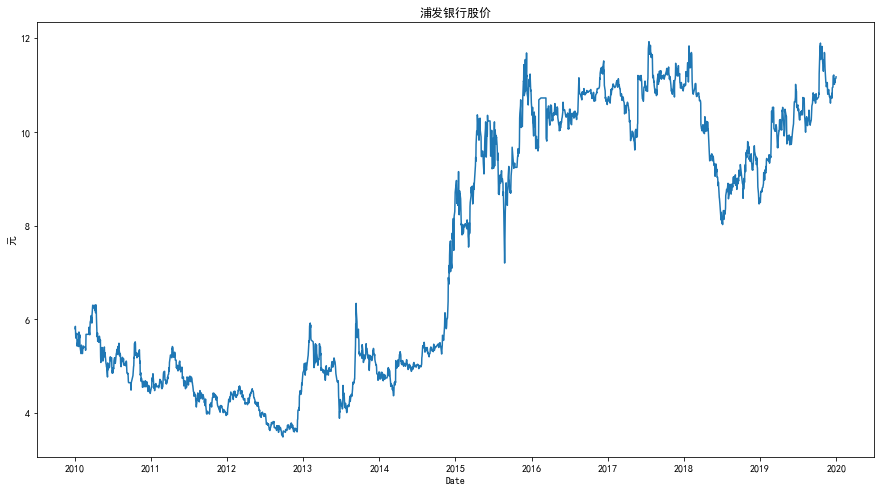

In [44]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(data.index,data['close'],label = '浦发银行')
ax.set(xlabel = 'Date',
       ylabel = '元',
       title = '浦发银行股价')
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [45]:
def get_technical_indicators(data):
    data['MA7'] = data.iloc[:,1].rolling(window=7).mean()
    data['MA21'] = data.iloc[:,1].rolling(window=21).mean()

    data['MACD'] = data.iloc[:,1].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()

    data['20SD'] = data.iloc[:, 1].rolling(20).std()
    data['upper_band'] = data['MA21'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA21'] - (data['20SD'] * 2)

    data['EMA'] = data.iloc[:,1].ewm(com=0.5).mean()

    data['logmomentum'] = np.log(data.iloc[:,1] - 1)

    return data

In [46]:
T_df = get_technical_indicators(data)
dataset = T_df.iloc[20:,:]

In [47]:
dataset['Date'] = dataset.index.tolist()
dataset = dataset.reset_index(drop = True)

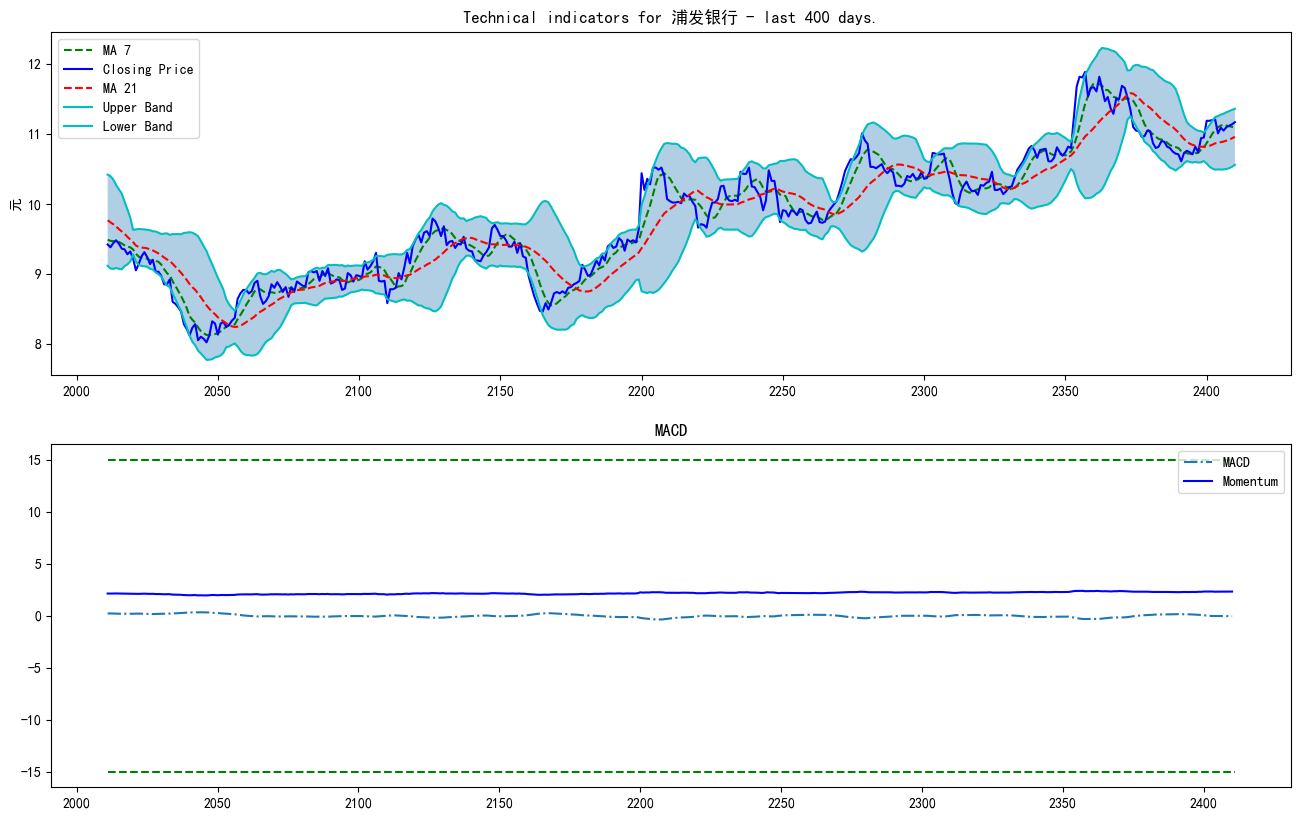

In [48]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0 - last_days

    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    plt.subplot(2, 1, 1)
    plt.plot(dataset['MA7'], label='MA 7', color='g', linestyle='--')
    plt.plot(dataset['close'], label='Closing Price', color='b')
    plt.plot(dataset['MA21'], label='MA 21', color='r', linestyle='--')
    plt.plot(dataset['upper_band'], label='Upper Band', color='c')
    plt.plot(dataset['lower_band'], label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for 浦发银行 - last {} days.'.format(last_days))
    plt.ylabel('元')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'], label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['logmomentum'], label='Momentum', color='b', linestyle='-')
       
    plt.legend()
    plt.show()
plot_technical_indicators(dataset, 400)

In [49]:
def get_fourier_transfer(dataset):
    # Get the columns for doing fourier
    data_FT = dataset[['Date', 'close']]

    close_fft = np.fft.fft(np.asarray(data_FT['close'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_com_df = pd.DataFrame()
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        fft_ = np.fft.ifft(fft_list_m10)
        fft_com = pd.DataFrame({'fft': fft_})
        fft_com['absolute of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.abs(x))
        fft_com['angle of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.angle(x))
        fft_com = fft_com.drop(columns='fft')
        fft_com_df = pd.concat([fft_com_df, fft_com], axis=1)

    return fft_com_df

In [50]:
dataset_F = get_fourier_transfer(dataset)
Final_data = pd.concat([dataset, dataset_F], axis=1)

In [51]:
Final_data.to_csv("Fourier.csv", index=False)

In [52]:
def plot_Fourier(dataset):
    data_FT = dataset[['Date', 'close']]

    close_fft = np.fft.fft(np.asarray(data_FT['close'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    plt.plot(data_FT['close'], label='Real')
    plt.xlabel('Days')
    plt.ylabel('USD')
    plt.title('浦发银行 (close) stock prices & Fourier transforms')
    plt.legend()
    plt.show()

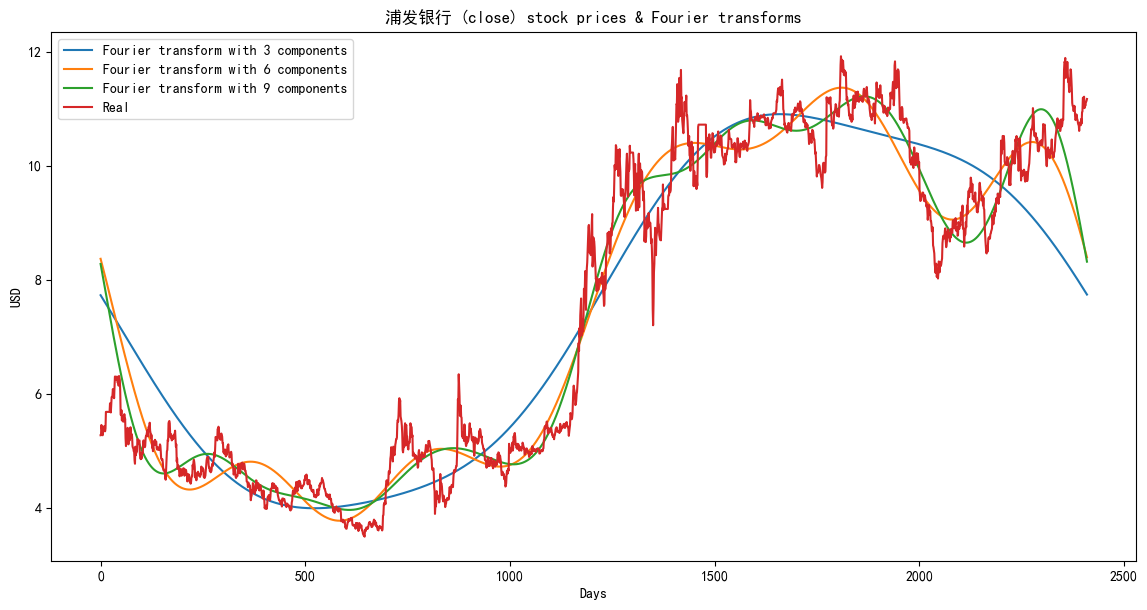

In [53]:
plot_Fourier(dataset)

In [54]:
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [55]:
dataset = pd.read_csv('Fourier.csv', parse_dates=['Date'])

In [56]:
dataset

,open,close,high,low,volume,中国石化,中信证券,三一重工,招商银行,保利发展,...,lower_band,EMA,logmomentum,Date,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
0,5.37,5.27,5.37,5.20,188617805.0,4.78,13.40,5.26,9.43,4.43,...,5.277755,5.310801,1.451614,2010-02-01,7.733372,-0.039754,8.367517,-0.020254,8.276080,-0.012499
1,5.30,5.27,5.40,5.25,178762157.0,4.76,13.21,5.32,9.64,4.41,...,5.257946,5.283600,1.451614,2010-02-02,7.721869,-0.039972,8.339998,-0.020459,8.235713,-0.012614
2,5.29,5.45,5.46,5.21,279235868.0,4.87,13.76,5.59,9.86,4.52,...,5.252335,5.394533,1.492904,2010-02-03,7.710353,-0.040188,8.312387,-0.020660,8.195293,-0.012723
3,5.37,5.39,5.45,5.37,168513484.0,4.80,13.62,5.49,9.77,4.52,...,5.233239,5.391511,1.479329,2010-02-04,7.698824,-0.040403,8.284689,-0.020858,8.154828,-0.012826
4,5.26,5.32,5.39,5.25,160240973.0,4.69,13.32,5.30,9.54,4.34,...,5.218786,5.343837,1.463255,2010-02-05,7.687283,-0.040615,8.256905,-0.021053,8.114324,-0.012923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,11.10,11.05,11.10,11.01,15150873.0,4.42,22.40,15.90,35.74,13.61,...,10.493414,11.061567,2.307573,2019-12-25,7.790688,-0.038639,8.503660,-0.019180,8.476854,-0.011842
2407,11.07,11.10,11.12,11.04,17433642.0,4.42,23.00,15.93,36.04,14.15,...,10.499453,11.087189,2.312535,2019-12-26,7.779252,-0.038865,8.476635,-0.019401,8.436865,-0.011984
2408,11.06,11.12,11.22,11.06,30939495.0,4.45,22.59,16.00,35.81,14.12,...,10.511873,11.109063,2.314514,2019-12-27,7.767802,-0.039090,8.449505,-0.019619,8.396786,-0.012121
2409,11.08,11.14,11.16,10.94,45471482.0,4.48,24.85,16.12,35.78,14.47,...,10.532611,11.129688,2.316488,2019-12-30,7.756339,-0.039313,8.422274,-0.019834,8.356623,-0.012252


In [57]:
# 日期放到index
datetime_series = dataset['Date']
dataset = dataset.set_index(datetime_series.values)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [58]:
dataset

,open,close,high,low,volume,中国石化,中信证券,三一重工,招商银行,保利发展,...,upper_band,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
2010-02-01,5.37,5.27,5.37,5.20,188617805.0,4.78,13.40,5.26,9.43,4.43,...,5.867959,5.277755,5.310801,1.451614,7.733372,-0.039754,8.367517,-0.020254,8.276080,-0.012499
2010-02-02,5.30,5.27,5.40,5.25,178762157.0,4.76,13.21,5.32,9.64,4.41,...,5.837292,5.257946,5.283600,1.451614,7.721869,-0.039972,8.339998,-0.020459,8.235713,-0.012614
2010-02-03,5.29,5.45,5.46,5.21,279235868.0,4.87,13.76,5.59,9.86,4.52,...,5.804807,5.252335,5.394533,1.492904,7.710353,-0.040188,8.312387,-0.020660,8.195293,-0.012723
2010-02-04,5.37,5.39,5.45,5.37,168513484.0,4.80,13.62,5.49,9.77,4.52,...,5.791522,5.233239,5.391511,1.479329,7.698824,-0.040403,8.284689,-0.020858,8.154828,-0.012826
2010-02-05,5.26,5.32,5.39,5.25,160240973.0,4.69,13.32,5.30,9.54,4.34,...,5.779309,5.218786,5.343837,1.463255,7.687283,-0.040615,8.256905,-0.021053,8.114324,-0.012923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,11.10,11.05,11.10,11.01,15150873.0,4.42,22.40,15.90,35.74,13.61,...,11.291348,10.493414,11.061567,2.307573,7.790688,-0.038639,8.503660,-0.019180,8.476854,-0.011842
2019-12-26,11.07,11.10,11.12,11.04,17433642.0,4.42,23.00,15.93,36.04,14.15,...,11.311976,10.499453,11.087189,2.312535,7.779252,-0.038865,8.476635,-0.019401,8.436865,-0.011984
2019-12-27,11.06,11.12,11.22,11.06,30939495.0,4.45,22.59,16.00,35.81,14.12,...,11.330032,10.511873,11.109063,2.314514,7.767802,-0.039090,8.449505,-0.019619,8.396786,-0.012121
2019-12-30,11.08,11.14,11.16,10.94,45471482.0,4.48,24.85,16.12,35.78,14.47,...,11.346436,10.532611,11.129688,2.316488,7.756339,-0.039313,8.422274,-0.019834,8.356623,-0.012252


In [59]:
X_value = pd.DataFrame(dataset.iloc[:, :])
y_value = pd.DataFrame(dataset.iloc[:, 1])

In [60]:
# 标准化
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)
X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

In [65]:
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1
# 获得X和ydataset
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)
# 分割数据集
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test
def predict_index(dataset, X_train, n_steps_in, n_steps_out):
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index
    return train_predict_index, test_predict_index

X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)

print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

X shape:  (2408, 3, 54)
y shape:  (2408, 1)
X_train shape:  (1686, 3, 54)
y_train shape:  (1686, 1)
y_c_train shape:  (1686, 3, 1)
X_test shape:  (722, 3, 54)
y_test shape:  (722, 1)
y_c_test shape:  (722, 3, 1)
index_train shape: (1686,)
index_test shape: (722,)


In [66]:
import tensorflow as tf
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

**lstm**

In [67]:
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

Epoch 1/50
27/27 - 5s - loss: 0.1590 - val_loss: 0.0639
Epoch 2/50
27/27 - 0s - loss: 0.2443 - val_loss: 0.0395
Epoch 3/50
27/27 - 0s - loss: 0.1588 - val_loss: 0.0472
Epoch 4/50
27/27 - 0s - loss: 0.2060 - val_loss: 0.1863
Epoch 5/50
27/27 - 0s - loss: 0.0727 - val_loss: 0.0173
Epoch 6/50
27/27 - 0s - loss: 0.0502 - val_loss: 0.0129
Epoch 7/50
27/27 - 0s - loss: 0.0422 - val_loss: 0.0261
Epoch 8/50
27/27 - 0s - loss: 0.0314 - val_loss: 0.0413
Epoch 9/50
27/27 - 0s - loss: 0.0478 - val_loss: 0.0152
Epoch 10/50
27/27 - 0s - loss: 0.0170 - val_loss: 0.0731
Epoch 11/50
27/27 - 0s - loss: 0.0354 - val_loss: 0.0618
Epoch 12/50
27/27 - 0s - loss: 0.0301 - val_loss: 0.0110
Epoch 13/50
27/27 - 0s - loss: 0.0130 - val_loss: 0.0109
Epoch 14/50
27/27 - 0s - loss: 0.0307 - val_loss: 0.0467
Epoch 15/50
27/27 - 0s - loss: 0.0053 - val_loss: 0.0748
Epoch 16/50
27/27 - 0s - loss: 0.0189 - val_loss: 0.0363
Epoch 17/50
27/27 - 0s - loss: 0.0064 - val_loss: 0.0229
Epoch 18/50
27/27 - 0s - loss: 0.0074 - 

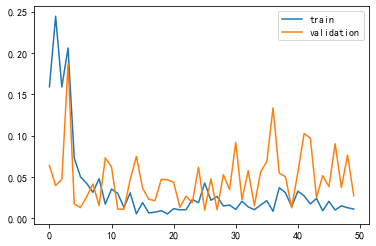

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 256)               187392    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 203,905
Trainable params: 203,905
Non-trainable params: 0
_________________________________________________________________
None
0.16478819317604418


In [69]:
def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    return model
model = basic_lstm(input_dim, feature_size)
print(model.summary())
yhat = model.predict(X_test, verbose=0)
rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

Text(0, 0.5, '股价')

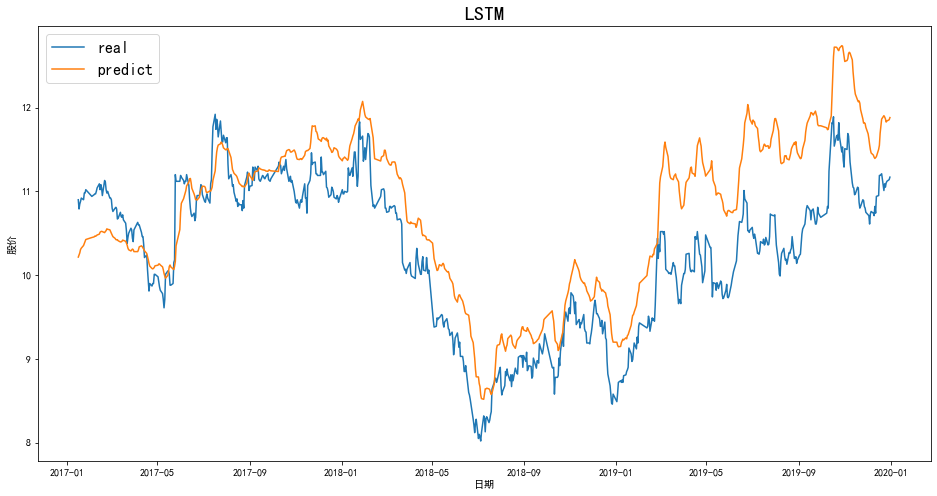

In [70]:
rescaled_real_y = y_scaler.inverse_transform(y_test)
rescaled_predicted_y = y_scaler.inverse_transform(yhat)
plt.figure(figsize=(16, 8))
plt.plot(index_test,rescaled_real_y,label = 'real')
plt.plot(index_test,rescaled_predicted_y, label = 'predict')
plt.legend(("real", "predict"), loc="upper left", fontsize=16)
plt.title("LSTM",fontsize = 20)
plt.xlabel("日期")
plt.ylabel("股价")

In [71]:
from pyecharts import options as opts
from pyecharts.charts import Line
line = Line()
line.add_xaxis(index_test.tolist())
line.add_yaxis('real',rescaled_real_y.tolist(),  label_opts = opts.LabelOpts(is_show = False))                       
line.add_yaxis('predict', rescaled_predicted_y.tolist(),  label_opts = opts.LabelOpts(is_show = False))   
line.set_global_opts(
    title_opts = opts.TitleOpts(title = 'LSTM'),
    datazoom_opts = [opts.DataZoomOpts()]
)
line.render_notebook()

**GRU**

In [34]:
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 50

In [35]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

Epoch 1/50
14/14 - 4s - loss: 0.7780 - val_loss: 0.3820
Epoch 2/50
14/14 - 0s - loss: 0.1783 - val_loss: 0.1776
Epoch 3/50
14/14 - 0s - loss: 0.0589 - val_loss: 0.0815
Epoch 4/50
14/14 - 0s - loss: 0.0273 - val_loss: 0.0426
Epoch 5/50
14/14 - 0s - loss: 0.0115 - val_loss: 0.0260
Epoch 6/50
14/14 - 0s - loss: 0.0081 - val_loss: 0.0186
Epoch 7/50
14/14 - 0s - loss: 0.0071 - val_loss: 0.0161
Epoch 8/50
14/14 - 0s - loss: 0.0067 - val_loss: 0.0155
Epoch 9/50
14/14 - 0s - loss: 0.0063 - val_loss: 0.0152
Epoch 10/50
14/14 - 0s - loss: 0.0058 - val_loss: 0.0148
Epoch 11/50
14/14 - 0s - loss: 0.0054 - val_loss: 0.0144
Epoch 12/50
14/14 - 0s - loss: 0.0050 - val_loss: 0.0141
Epoch 13/50
14/14 - 0s - loss: 0.0046 - val_loss: 0.0138
Epoch 14/50
14/14 - 0s - loss: 0.0044 - val_loss: 0.0135
Epoch 15/50
14/14 - 0s - loss: 0.0041 - val_loss: 0.0133
Epoch 16/50
14/14 - 0s - loss: 0.0039 - val_loss: 0.0131
Epoch 17/50
14/14 - 0s - loss: 0.0037 - val_loss: 0.0129
Epoch 18/50
14/14 - 0s - loss: 0.0036 - 

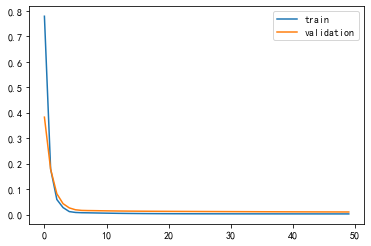

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 3, 128)            70656     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 110,017
Trainable params: 110,017
Non-trainable params: 0
_________________________________________________________________
None
0.09975327108349365


In [36]:
def basic_GRU(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(GRU(units=128, return_sequences = True, input_shape=(input_dim, feature_size)))  # 256, return_sequences = True
    model.add(GRU(units=64, input_shape=(input_dim, feature_size)))
    #model.add(Dense(128))
    model.add(Dense(32))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr=LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    return model
model = basic_GRU(input_dim, output_dim, feature_size)
yhat = model.predict(X_test, verbose=0)
print(model.summary())
rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

Text(0, 0.5, '股价')

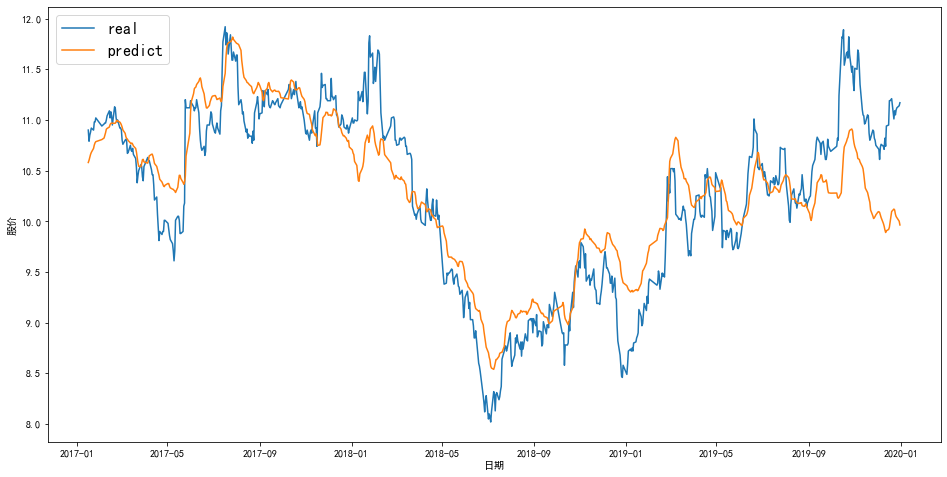

In [37]:
rescaled_real_y = y_scaler.inverse_transform(y_test)
rescaled_predicted_y = y_scaler.inverse_transform(yhat)
plt.figure(figsize=(16, 8))
plt.plot(index_test,rescaled_real_y,label = 'real')
plt.plot(index_test,rescaled_predicted_y, label = 'predict')
plt.legend(("real", "predict"), loc="upper left", fontsize=16)
plt.xlabel("日期")
plt.ylabel("股价")

In [38]:
line = Line()
line.add_xaxis(index_test.tolist())
line.add_yaxis('real',rescaled_real_y.tolist(),  label_opts = opts.LabelOpts(is_show = False))                       
line.add_yaxis('predict', rescaled_predicted_y.tolist(),  label_opts = opts.LabelOpts(is_show = False))   
line.set_global_opts(
    title_opts = opts.TitleOpts(title = 'GRU'),
    datazoom_opts = [opts.DataZoomOpts()]
)
line.render_notebook()